In [45]:
import pandas as pd
import numpy as np
import statistics
import math
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedShuffleSplit
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
import keras
import joblib



import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import random


In [3]:
data = pd.read_csv("roundnessdata.csv",skip_blank_lines = False)
#data2 = pd.read_csv("roundnessdata2.csv",skip_blank_lines = False)
#train_df = pd.read_csv("traindata.csv",skip_blank_lines = False)
#test_df = pd.read_csv("testdata.csv")

In [141]:
data2 = data2.drop(data2[(data2.roundness>=.15) & (data2.roundness<.25)].iloc[500:1000,:].index)#Eliminimos 500 de la clase 2
data2 = data2.drop(data2[(data2.roundness>=.25) & (data2.roundness<.35)].iloc[500:1000,:].index)#Eliminimos 500 de la clase 3
data2 = data2.sort_values('roundness') #Se aacomoda por los valores delroundness
data2 = data2.reset_index().iloc[:,1:data2.shape[1]+1] #Se acomodan los indices y se borran los viejos
#data = data.drop(data[pd.isnull(data.roundness)].index)


In [154]:
vector = np.transpose(data2.iloc[:,1:241])
vector = vector.values.reshape(50,4,data2.shape[0])
vector = np.c_[data2.roundness,vector.T.reshape(data2.shape[0],200)]
filteredData = vector[(data2.roundness<=.15) ]
filteredData = np.r_[filteredData,vector[(data2.roundness>=.25) & (data2.roundness<=.35)][200:451,:]]
filteredData = np.r_[filteredData,vector[(data2.roundness>=.45) & (data2.roundness<=.55)]]
filteredData = np.r_[filteredData,vector[(data2.roundness>=.65) & (data2.roundness<=.75)][200:451,:]]
filteredData = np.r_[filteredData,vector[(data2.roundness>=.85) & (data2.roundness<=.95)][200:451,:]]

In [155]:
filteredData.shape

(1213, 201)

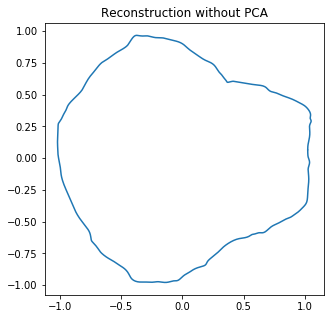

In [31]:
A0=0
C0=0
recon=np.zeros((leng_chain,2))
for t in range(leng_chain):
    x = 0.0
    y = 0.0
    for ii in range(60):
        x = x + (vector[0,ii,0] * np.cos(2 * (ii+1) * np.pi * (t+1) / leng_chain) + vector[1,ii,0] * np.sin(2 * (ii+1) * np.pi* (t+1) / leng_chain))
        y = y + (vector[2,ii,0] * np.cos(2 * (ii+1) * np.pi * (t+1) / leng_chain) + vector[3,ii,0] * np.sin(2 * (ii+1) * np.pi* (t+1) / leng_chain))
    recon[t,0] = A0 + x
    recon[t,1] = C0 + y 
# print(recon[0:9,:])    
plt.figure(figsize=(5, 5))   
plt.plot(recon[:,0], recon[:,1]);   
plt.title('Reconstruction without PCA')
plt.show()   

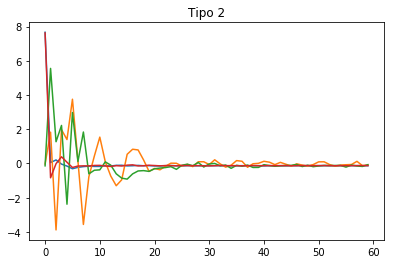

In [32]:
leng_chain=869
scaler = StandardScaler()
fig = plt.figure(figsize = (14,4))
arr = np.transpose(vector[:,:,0])
arr_std=scaler.fit_transform(arr)
b = fig.add_subplot(1, 2, 2)
b.set_title('Tipo 2')
plt.plot(arr_std2[:,0])
plt.plot(arr_std2[:,1])
plt.plot(arr_std2[:,2])
plt.plot(arr_std2[:,3])
plt.show()

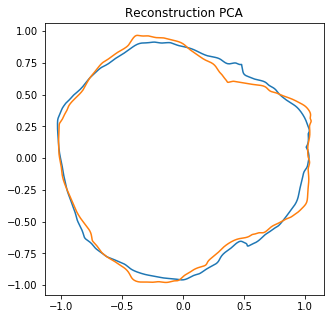

In [36]:
#pca = PCA(n_components=4)
pca = PCA(n_components=2,svd_solver='full')
pca.fit(arr_std)
pca_data=pca.transform(arr_std)
# print (pca.explained_variance_)
# print (pca.explained_variance_ratio_)
# print (pca.explained_variance_ratio_.cumsum())

eigenvectores=pca.components_
eigenvalores=pca.singular_values_
# per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
# labels=['PC'+str(x) for x in range(1,len(per_var)+1)]
# plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)

reco=pca.inverse_transform(pca_data)
reco=scaler.inverse_transform(reco)
# print(reco.shape)

reco=reco.T
A0=0
C0=0
recon2=np.zeros((leng_chain,2))
for t in range(leng_chain):
    x = 0.0
    y = 0.0
    for ii in range(60):
        x = x + (reco[0,ii] * np.cos(2 * (ii+1) * np.pi * (t+1) / leng_chain) + reco[1,ii] * np.sin(2 * (ii+1) * np.pi* (t+1) / leng_chain))
        y = y + (reco[2,ii] * np.cos(2 * (ii+1) * np.pi * (t+1) /leng_chain) + reco[3,ii] * np.sin(2 * (ii+1) * np.pi* (t+1) / leng_chain))
    recon2[t,0] = A0 + x
    recon2[t,1] = C0 + y 
# print(recon[0:9,:])    
plt.figure(figsize=(5, 5))   
plt.plot(recon2[:,0], recon2[:,1]);  
plt.plot(recon[:,0], recon[:,1]);  
plt.title('Reconstruction PCA')
plt.show() 

In [3]:
#Se acomoda la información de cada particula
matrix = np.zeros((data.shape[0],60*3))
vector = np.transpose(data.iloc[:,1:241])
sc = StandardScaler() 
#vector = sc.fit_transform(vector) 
vector = vector.values.reshape(4,60,data.shape[0])
pca = PCA(3,svd_solver='full') 
#pca.fit(np.transpose(vector[:,:,0])) 

In [127]:
#Se ejecuta la estandarización y el pca de cada
for i in range(0,vector.shape[2]):
    vector[:,:,i] = sc.fit_transform(vector[:,:,i]) 
    
    matrix[i,:]=np.concatenate(np.transpose(pca.fit_transform(np.transpose(vector[:,:,i]))))
    print(pca.explained_variance_ratio_.cumsum())

[0.41819025 0.73734009 1.        ]
[0.45700619 0.74102832 1.        ]
[0.45163976 0.79948332 1.        ]
[0.419342  0.7414501 1.       ]
[0.41819025 0.73734009 1.        ]
[0.46344388 0.76389829 1.        ]
[0.45669702 0.78104437 1.        ]
[0.41591269 0.75101585 1.        ]
[0.46648005 0.78302801 1.        ]
[0.40126985 0.75893512 1.        ]
[0.38297587 0.74019245 1.        ]
[0.43125321 0.7352089  1.        ]
[0.4016713 0.766212  1.       ]
[0.42409809 0.74600644 1.        ]
[0.36882255 0.71362111 1.        ]
[0.43213675 0.75266672 1.        ]
[0.40856334 0.7337673  1.        ]
[0.40399642 0.75240187 1.        ]
[0.39032865 0.74973136 1.        ]
[0.42037894 0.75027634 1.        ]
[0.45648622 0.75006541 1.        ]
[0.38269201 0.73709454 1.        ]
[0.3807336 0.7600394 1.       ]
[0.41035339 0.78209078 1.        ]
[0.43980502 0.78549794 1.        ]
[0.44378907 0.78173707 1.        ]
[0.38499539 0.75456389 1.        ]
[0.47156748 0.78618757 1.        ]
[0.38814607 0.75633023 1.    

In [177]:
test_x.iloc[test_res.index]

,finalCellRound7,finalCellRound8,finalCellRound9,finalCellRound10,finalCellRound11,finalCellRound12,finalCellRound13,finalCellRound14,finalCellRound15,finalCellRound16,...,finalCellRound222,finalCellRound223,finalCellRound224,finalCellRound225,finalCellRound226,finalCellRound227,finalCellRound228,finalCellRound229,finalCellRound230,finalCellRound231
0,0.000949,-0.002828,0.001499,-0.000730,0.000834,0.000578,0.000353,0.000406,0.000022,-0.000140,...,0.000021,-0.000142,-0.000028,0.000216,0.000082,-0.000118,-3.499770e-05,1.970320e-05,-4.229430e-05,3.437860e-07
1,-0.006646,0.005027,-0.006784,0.008540,-0.006746,0.001231,-0.008350,-0.005872,-0.001919,-0.002153,...,-0.001545,0.000408,0.000362,-0.000359,0.000381,0.000544,3.519110e-04,-3.673900e-04,-1.570647e-03,3.144160e-04
2,-0.008532,-0.003711,0.002162,-0.008279,0.004800,-0.003268,0.005796,0.001991,0.003307,0.000691,...,-0.000688,-0.000319,-0.000743,-0.000147,0.000405,0.000942,2.398240e-04,-4.569600e-04,-1.496280e-04,-5.152340e-04
3,0.010155,-0.012269,0.016582,-0.010907,0.000028,0.001983,0.000008,0.005362,0.004604,0.002708,...,-0.000650,0.000429,0.000455,-0.000089,-0.000718,0.000866,3.297940e-07,-2.268300e-04,4.550110e-04,-1.340110e-04
4,-0.000339,-0.003087,-0.000149,-0.000972,0.000273,0.000240,0.000571,-0.000031,-0.000215,-0.000164,...,0.000094,0.000076,-0.000026,-0.000023,0.000092,0.000062,-1.152900e-04,-5.676590e-05,-3.944330e-05,1.248700e-04
5,0.002181,0.002220,0.004439,-0.000214,0.000174,-0.001285,0.001502,0.000093,0.002045,-0.000474,...,-0.001137,-0.000425,0.000470,0.000960,-0.000363,-0.000796,2.916720e-04,-1.039151e-03,1.700410e-04,1.013799e-03
6,0.007233,0.002686,-0.001389,0.001553,0.002377,-0.005432,-0.000938,-0.003403,0.000676,-0.002334,...,-0.000791,0.000011,-0.000175,0.000553,0.000633,-0.000490,3.031310e-04,-1.988180e-04,-5.262500e-04,-2.128050e-04
7,0.002848,-0.001310,-0.000424,-0.000016,0.000762,0.001037,0.000069,-0.000296,-0.000404,-0.000031,...,0.000074,0.000041,0.000037,0.000008,-0.000014,-0.000149,-1.305200e-05,9.641500e-05,7.763810e-05,-6.736700e-05
8,-0.002472,-0.004314,0.000822,0.000194,0.002637,-0.001914,0.000615,0.001477,-0.000663,0.000144,...,0.000365,-0.000947,0.000461,0.000439,-0.000369,-0.000196,-3.466780e-04,-2.088240e-04,1.817310e-04,-1.344240e-04
9,0.004961,-0.000179,-0.000811,0.000084,-0.001278,0.000145,-0.000786,-0.000326,0.000050,-0.000500,...,0.000071,-0.000114,-0.000095,0.000023,-0.000024,0.000067,1.278620e-05,-1.469150e-04,1.011000e-04,2.565280e-05


<function matplotlib.pyplot.show(*args, **kw)>

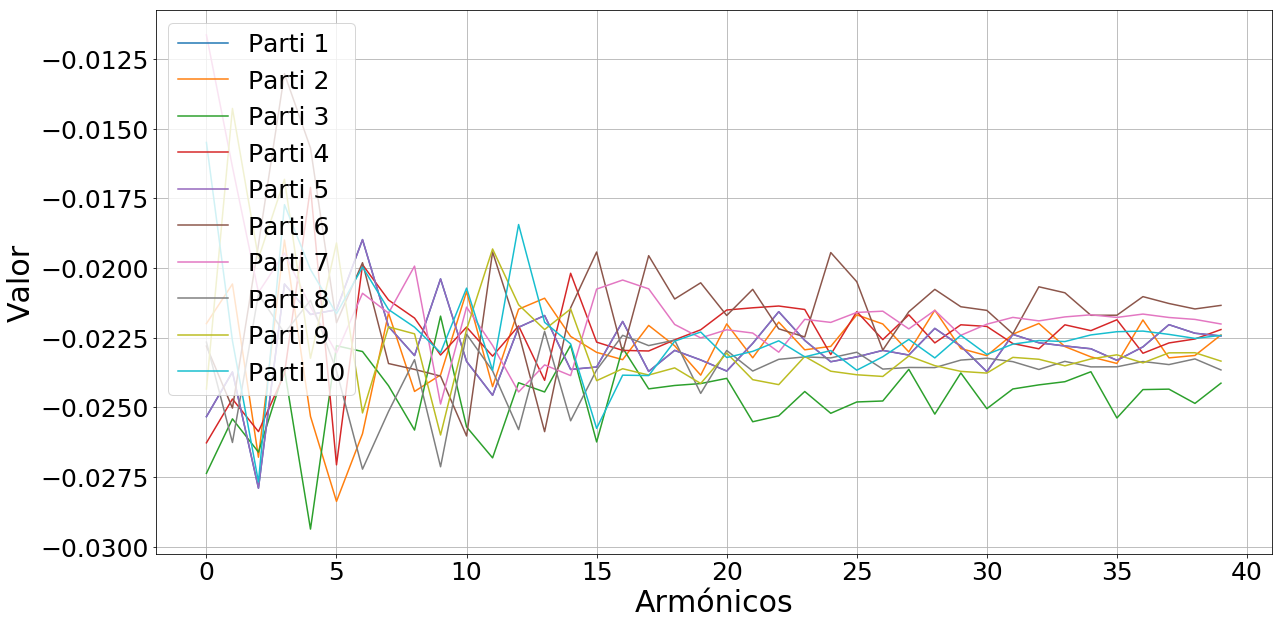

In [6]:
plt.figure(figsize=(20,10)) 
#range(test_res['predicted'].shape[0],0,-1)
plt.plot(matrix[0,10:50], label="Parti 1") 
plt.plot(matrix[1,10:50], label="Parti 2") 
plt.plot(matrix[2,10:50], label="Parti 3") 
plt.plot(matrix[3,10:50], label="Parti 4") 
plt.plot(matrix[4,10:50], label="Parti 5") 
plt.plot(matrix[5,10:50], label="Parti 6") 
plt.plot(matrix[6,10:50], label="Parti 7") 
plt.plot(matrix[7,10:50], label="Parti 8") 
plt.plot(matrix[8,10:50], label="Parti 9") 
plt.plot(matrix[9,10:50], label="Parti 10") 
plt.rc('legend', fontsize=25) 
plt.ylabel('Valor', fontsize=30) 
plt.xlabel('Armónicos', fontsize=30) 
plt.legend(loc="upper left")

#plt.title("Resultado del entrenamiento de la red neuronal profunda",fontsize=35) 
plt.xticks(size = 25) 
plt.yticks(size = 25) 
plt.grid(True) 
plt.show

In [21]:
#lim_inf = 1
#lim_sup = 242
#neuronas = 10 
#np.r_[0:124,376:500,1001:1123] 1 4 9
#np.r_[0:124,250:374,500:625,750:875,1000:1123]
train_x = data.iloc[:,21:121]

train_y = data.iloc[:,0:1]
#np.r_[661:848,0:98]
#train_x = train_df.iloc[:,lim_inf:lim_sup]

#train_y = train_df.iloc[:,0:1]
#np.r_[214:275,0:27]
#test_x = test_df.iloc[:,lim_inf:lim_sup]

#test_y = test_df.iloc[:,0:1]

#Para cuando se usa PCA
#train_x, test_x, train_y, test_y = train_test_split(matrix[:,np.r_[9:50,69:100,109:150]], train_y, test_size=0.2)
#Cuando se usa los datos directo 5:50,65:110,125:170,185:230
#train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.05)

sc = StandardScaler() 
train_x = sc.fit_transform(train_x) 
#test_x = sc.transform(test_x)

n_cols = train_x.shape[1] 
model = Sequential() 
model.add(Dense(500, activation="relu", input_shape=(n_cols,))) 
model.add(Dense(150,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(150,activation="relu")) 
model.add(Dense(400,activation="relu"))  
model.add(Dense(150,activation="relu")) 
model.add(Dense(300,activation="relu"))
model.add(Dense(450,activation="relu"))

model.add(Dense(9,activation="relu")) 
model.add(Dense(1,activation="linear")) 
opt = keras.optimizers.Adadelta( learning_rate=0.060, rho=0.95, epsilon=3e-04)
#learning_rate=0.0068, rho=0.5,momentum=0.1       , rho=0.8, epsilon=1e-05

#my_lr_scheduler = keras.callbacks.LearningRateScheduler(adapt_learning_rate) 
model.compile(optimizer=opt, loss='mae',metrics=['mae','mse','mape'])

#set early stopping monitor so the model stops training when it won't improve anymore 
early_stopping_monitor = EarlyStopping(patience=22,monitor='loss')

#train model #,callbacks=[early_stopping_monitor]
#model.fit(train_x,train_y,validation_data = (test_x,test_y),callbacks=[early_stopping_monitor], epochs=600,verbose=0)
classifier = KerasClassifier(build_fn = model, epochs = 100)
cross_val_score(estimator = classifier,X = train_x, y = train_y,cv=10)
##Train

train_y = train_y.reset_index().sort_values('index')

train_x = train_x[train_y.index]
#train_x = train_x.reset_index()
#train_y = train_y.reset_index()
#train_x = train_x.iloc[:,1:train_x.shape[1]] 
train_y = train_y.reset_index() 
ynew = model.predict(train_x) 
diff = abs(ynew - train_y) 
dummy_y = train_y 
dummy_y['predicted'] = ynew 
mse = mean_squared_error(dummy_y['roundness'], dummy_y['predicted']) 
me = statistics.stdev(dummy_y['predicted'])/math.sqrt(dummy_y['predicted'].shape[0]) 
fig0 = plt.figure(0,figsize=(20,10)) 
#range(dummy_y['predicted'].shape[0],0,-1),
plt.plot(dummy_y['predicted'].sort_index(), label="Ajuste") 
plt.plot(dummy_y['roundness'].sort_index(), label="Datos de entrenamiento") 
plt.rc('legend', fontsize=25) 
plt.ylabel('Grado de redondez', fontsize=30) 
plt.xlabel('Imágenes', fontsize=30) 
plt.legend(loc="upper left")

#plt.title("Resultado del entrenamiento de la red neuronal profunda",fontsize=35)
plt.xticks(size = 25) 
plt.yticks(size = 25) 
plt.grid(True)
plt.show 
plt.savefig('redondezComparacion.png')

##Test

test_res = test_y 

test_res = test_res.reset_index().sort_values('index') 
test_x = test_x[test_res.index]

#test_x = test_x.reset_index()

#test_x = test_x.iloc[:,1:test_x.shape[1]] 
test_res = test_res.reset_index() 
ynew = model.predict(test_x) 
diff = abs(ynew - test_y) 
test_res['predicted'] = ynew 
mse = mean_squared_error(test_res['roundness'], test_res['predicted']) 
me = statistics.stdev(test_res['predicted'])/math.sqrt(test_res['predicted'].shape[0]) 
plt.figure(figsize=(20,10)) 
#range(test_res['predicted'].shape[0],0,-1)
plt.plot(test_res['predicted'].sort_index(), label="Ajuste") 
plt.plot(test_res['roundness'].sort_index(), label="Datos de prueba") 
plt.rc('legend', fontsize=25) 
plt.ylabel('Grado de redondez', fontsize=30) 
plt.xlabel('Imágenes', fontsize=30) 
plt.legend(loc="upper left")

#plt.title("Resultado del entrenamiento de la red neuronal profunda",fontsize=35) 
plt.xticks(size = 25) 
plt.yticks(size = 25) 
plt.grid(True) 
plt.show

TypeError: can't pickle _thread.RLock objects

<function matplotlib.pyplot.show(*args, **kw)>

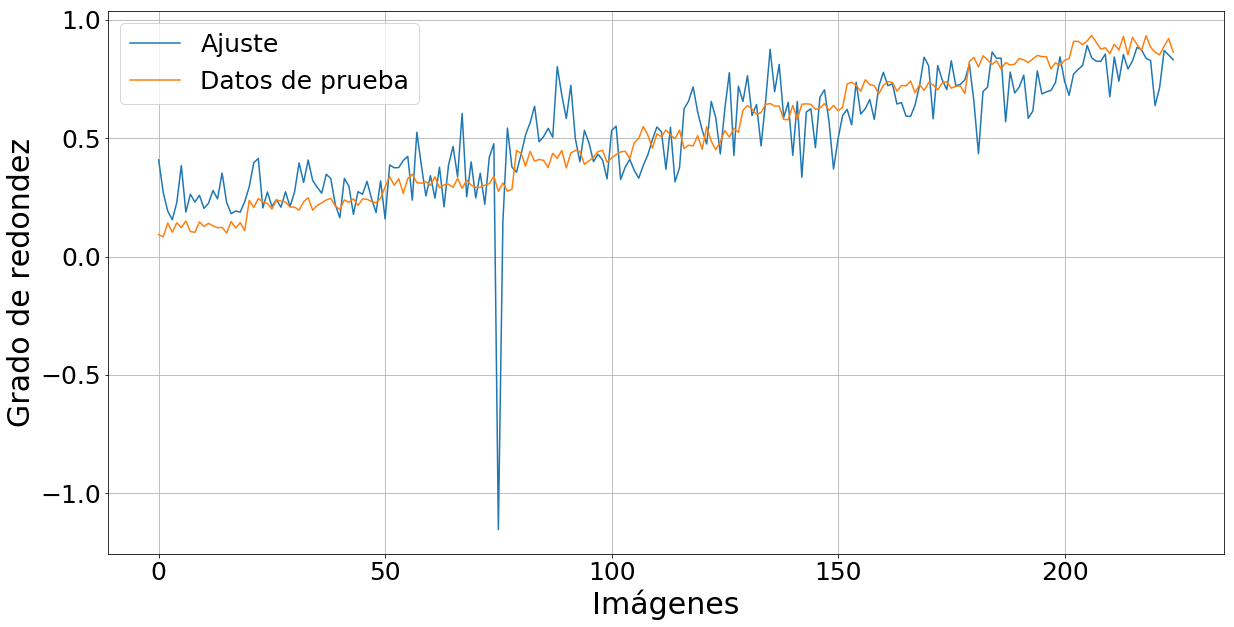

In [426]:
##Test

test_res = test_y
test_res = test_res.reset_index().sort_values('index')
test_x = test_x[test_res.index]
test_res = test_res.reset_index()
ynew = model.predict(test_x)
diff = abs(ynew - test_y)
test_res['predicted'] = ynew
mse = mean_squared_error(test_res['roundness'], test_res['predicted'])
me = statistics.stdev(test_res['predicted'])/math.sqrt(test_res['predicted'].shape[0])
plt.figure(figsize=(20,10))
plt.plot(test_res['predicted'].sort_index(), label="Ajuste")
plt.plot(test_res['roundness'].sort_index(), label="Datos de prueba")
plt.rc('legend', fontsize=25)
plt.ylabel('Grado de redondez', fontsize=30)
plt.xlabel('Imágenes', fontsize=30)
plt.legend(loc="upper left")
#plt.title("Resultado del entrenamiento de la red neuronal profunda",fontsize=35)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.grid(True)
plt.show

C:\Users\HeavyRain350\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


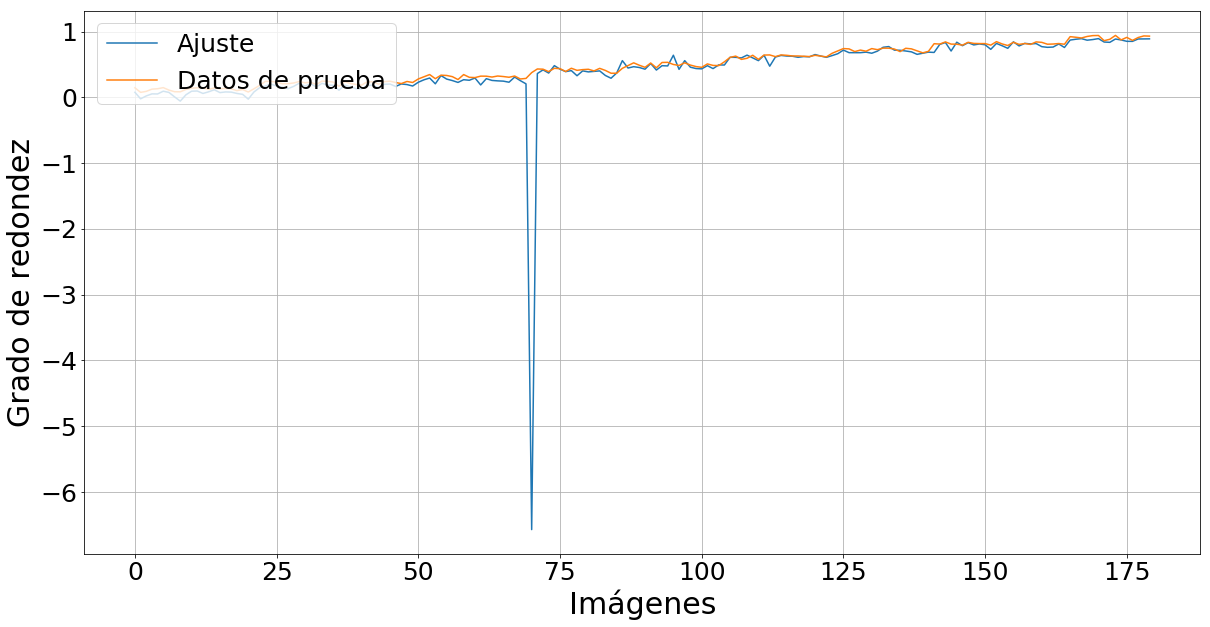

In [464]:
train_x2 = train_x[::5, :]
train_y2 = train_y.iloc[::5,:]
train_y2 = train_y2.reset_index().sort_values('index')
train_x2 = train_x2[train_y2.index]
train_y2 = train_y2.reset_index()
#train_y2 = train_y2.reset_index()
ynew = model.predict(train_x2)
diff = abs(ynew - train_y2)
dummy_y2 = train_y2
dummy_y2['predicted'] = ynew
mse2 = mean_squared_error(dummy_y2['roundness'], dummy_y2['predicted'])
me2 = statistics.stdev(dummy_y2['predicted'])/math.sqrt(dummy_y2['predicted'].shape[0])

figTest=plt.figure(1,figsize=(20,10))
plt.plot(dummy_y2['predicted'].sort_index(), label="Ajuste")
plt.plot(dummy_y2['roundness'].sort_index(), label="Datos de prueba")
plt.rc('legend', fontsize=25)
plt.ylabel('Grado de redondez', fontsize=30)
plt.xlabel('Imágenes', fontsize=30)
plt.legend(loc="upper left")
#plt.title("Resultado del entrenamiento de la red neuronal profunda",fontsize=35)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.grid(True)
figTest.show()
figTest.savefig('redondezTesting.png')


In [496]:
train_y2=train_y2.reset_index().sort_values('index')

In [501]:
train_y2

,index,roundness,predicted
71,0,0.147144,0.135400
42,3,0.077683,0.072275
24,13,0.135743,0.141120
15,19,0.143410,0.132731
165,21,0.105966,0.108787
96,28,0.089833,0.077534
120,45,0.140080,0.144986
97,49,0.146276,0.145260
101,62,0.122222,0.117849
81,72,0.135640,0.134468


In [386]:
mse
#Error cuadratico medio

0.029263216089917058

In [387]:
me
#Error promedio o estándar

0.017883638095856524

In [129]:
abEr = abs(dummy_y['roundness']-dummy_y['predicted'])

In [149]:
set1 = abEr[abEr < 0.01]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

51.57575757575758

In [137]:
set1 = abEr[abEr < 0.02]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

79.21212121212122

In [161]:
diff2 =  abs(test_res['roundness']-test_res['predicted'])
set1 = diff2[diff2 < 0.1]
porc = 100*set1.shape[0]/diff2.shape[0]
porc

36.95652173913044

In [151]:
set1 = abEr[abEr < 0.08]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

98.84848484848484

In [140]:
set1 = abEr[abEr < 0.09]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

98.84848484848484

In [145]:
set1 = diff2[diff2 < 0.1]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

11.151515151515152

In [157]:
abEr<0.02


0       False
1       False
2       False
3        True
4        True
5        True
6        True
7       False
8        True
9        True
10       True
11       True
12       True
13      False
14       True
15       True
16       True
17      False
18       True
19       True
20       True
21       True
22       True
23       True
24      False
25       True
26       True
27       True
28       True
29       True
        ...  
1620     True
1621    False
1622    False
1623    False
1624    False
1625     True
1626    False
1627     True
1628     True
1629    False
1630    False
1631    False
1632    False
1633     True
1634    False
1635    False
1636     True
1637    False
1638     True
1639    False
1640    False
1641    False
1642     True
1643    False
1644    False
1645    False
1646     True
1647    False
1648     True
1649    False
Length: 1650, dtype: bool

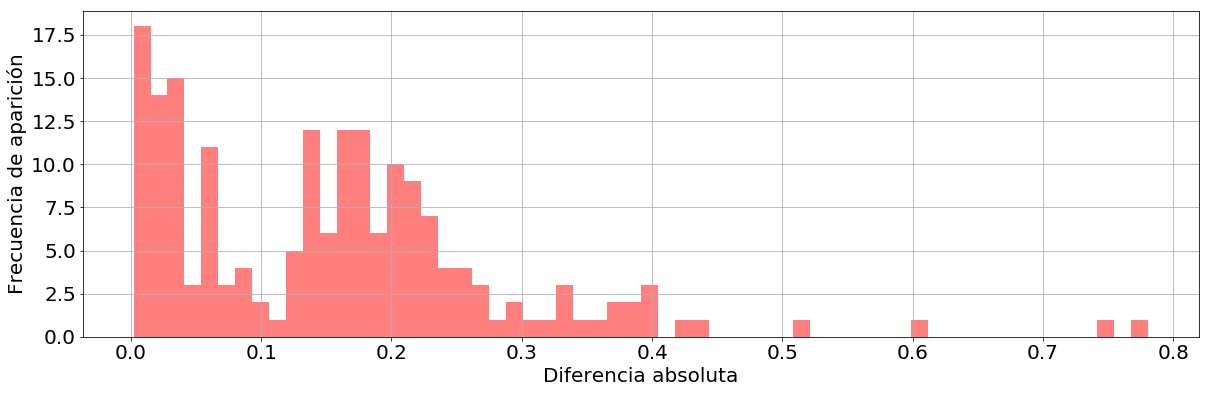

In [162]:
fig=plt.figure(figsize=(20,6))
n, bins, patches = plt.hist(diff2, 60, facecolor='red', alpha=0.5)

# add a 'best fit' line
plt.xlabel('Diferencia absoluta', fontsize=20)
plt.ylabel('Frecuencia de aparición', fontsize=20)

# Tweak spacing to prevent clipping of ylabel
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(True)
#plt.title("Histograma del error absoluto",fontsize=28)
plt.show()
fig.savefig('histogramaError.png')

In [181]:
vector = np.transpose(data2.iloc[:,21:201])
vector = vector.values.reshape(45,4,data2.shape[0])
vector = np.c_[data2.roundness,vector.T.reshape(data2.shape[0],180)]
#[:,np.r_[6:51,56:101,106:151,156:201]]
filteredDataClase1 = pd.DataFrame(np.r_[vector[(data2.roundness<=.15)][:,0:181],data.iloc[0:124,np.r_[0,6:51,66:111,126:171,186:231]]]).sample(frac=1).reset_index(drop=True)
filteredDataX = filteredDataClase1.iloc[:,1:181]
filteredDataY = filteredDataClase1.iloc[:,0]

filteredDataClase2 = pd.DataFrame(np.r_[vector[(data2.roundness>=.25) & (data2.roundness<=.35)][200:451,0:181],data.iloc[250:374,np.r_[0,6:51,66:111,126:171,186:231]]]).sample(frac=1).reset_index(drop=True)
filteredDataX = np.r_[filteredDataX,filteredDataClase2.iloc[:,1:181]]
filteredDataY = np.r_[filteredDataY,filteredDataClase2.iloc[:,0]]

filteredDataClase3 = pd.DataFrame(np.r_[vector[(data2.roundness>=.45) & (data2.roundness<=.55)][:,0:181],data.iloc[500:625,np.r_[0,6:51,66:111,126:171,186:231]]]).sample(frac=1).reset_index(drop=True)
filteredDataX = np.r_[filteredDataX,filteredDataClase3.iloc[:,1:181]]
filteredDataY = np.r_[filteredDataY,filteredDataClase3.iloc[:,0]]

filteredDataClase4 = pd.DataFrame(np.r_[vector[(data2.roundness>=.65) & (data2.roundness<=.75)][200:451,0:181],data.iloc[750:875,np.r_[0,6:51,66:111,126:171,186:231]]]).sample(frac=1).reset_index(drop=True)
filteredDataX = np.r_[filteredDataX,filteredDataClase4.iloc[:,1:181]]
filteredDataY = np.r_[filteredDataY,filteredDataClase4.iloc[:,0]]

filteredDataClase5 = pd.DataFrame(np.r_[vector[(data2.roundness>=.85) & (data2.roundness<=.95)][200:451,0:181],data.iloc[1000:1123,np.r_[0,6:51,66:111,126:171,186:231]]]).sample(frac=1).reset_index(drop=True)
filteredDataX = np.r_[filteredDataX,filteredDataClase5.iloc[:,1:181]]
filteredDataY = np.r_[filteredDataY,filteredDataClase5.iloc[:,0]]

In [4]:
data

,roundness,finalCellRound2,finalCellRound3,finalCellRound4,finalCellRound5,finalCellRound6,finalCellRound7,finalCellRound8,finalCellRound9,finalCellRound10,...,finalCellRound152,finalCellRound153,finalCellRound154,finalCellRound155,finalCellRound156,finalCellRound157,finalCellRound158,finalCellRound159,finalCellRound160,finalCellRound161
0,0.147144,1,0.023713,0.043265,0.012136,-0.002781,-0.022673,-0.012271,-0.006875,-0.003245,...,-0.001526,-0.000476,0.001203,0.000149,-0.000138,-6.350000e-05,-8.989760e-04,-0.000470,0.000608,-2.712350e-04
1,0.112582,1,0.070587,0.022753,0.040623,0.014972,0.018732,0.021648,-0.007458,0.005895,...,0.000265,-0.001041,0.000348,0.000102,-0.001073,1.017493e-03,9.591750e-04,0.000306,0.000829,2.075180e-04
2,0.147144,1,0.014794,0.045179,0.017507,0.021796,0.007233,0.002686,-0.001389,0.001553,...,0.001076,-0.000605,-0.000277,-0.000012,0.000048,-2.467560e-04,-4.724550e-04,0.000432,-0.000180,3.312490e-04
3,0.077683,1,-0.002386,0.012539,-0.018902,0.004618,-0.012409,0.003669,-0.001579,-0.001550,...,0.000134,0.000160,0.001611,-0.000381,-0.000677,6.320000e-05,2.529410e-04,0.000167,-0.000295,4.301270e-04
4,0.113229,1,0.023713,0.043265,0.012136,-0.002781,-0.022673,-0.012271,-0.006875,-0.003245,...,-0.001526,-0.000476,0.001203,0.000149,-0.000138,-6.350000e-05,-8.989760e-04,-0.000470,0.000608,-2.712350e-04
5,0.136824,1,-0.061711,0.031646,-0.030336,0.017602,0.004583,0.013525,-0.004101,-0.001525,...,-0.000117,0.000595,-0.002481,-0.000585,0.001813,2.220380e-04,-1.385050e-03,0.000516,0.000783,6.050080e-04
6,0.123816,1,-0.007596,0.033374,0.011911,-0.003444,0.019307,0.006543,0.011692,0.013101,...,-0.000460,-0.000707,-0.001018,0.000276,-0.000154,7.511230e-04,1.635750e-04,-0.000270,0.000164,-2.938270e-04
7,0.146037,1,0.042984,0.003789,0.025619,0.002476,0.017890,-0.001754,0.009635,-0.009516,...,0.000605,-0.000076,-0.000185,0.000395,0.000132,1.514730e-04,3.120000e-05,-0.000124,-0.000031,3.464610e-04
8,0.130513,1,0.025491,0.033823,-0.013248,0.009712,-0.003772,-0.012315,0.012260,-0.005001,...,0.000053,0.000144,-0.000403,0.000052,-0.000332,-8.094260e-04,-7.359560e-04,-0.000158,-0.000313,-3.728190e-04
9,0.148250,1,0.084452,0.022112,0.051900,0.000111,0.020620,0.011006,-0.009062,0.003657,...,-0.000894,0.000466,0.000829,0.001082,0.000130,-3.943280e-04,-1.756130e-04,0.000109,-0.000527,-6.460000e-05


In [11]:
train_x.iloc[:,np.r_[5:40,45:80,85:120,125:160]]

,finalCellRound7,finalCellRound8,finalCellRound9,finalCellRound10,finalCellRound11,finalCellRound12,finalCellRound13,finalCellRound14,finalCellRound15,finalCellRound16,...,finalCellRound152,finalCellRound153,finalCellRound154,finalCellRound155,finalCellRound156,finalCellRound157,finalCellRound158,finalCellRound159,finalCellRound160,finalCellRound161
0,-0.022673,-0.012271,-0.006875,-0.003245,-0.005380,-0.005375,0.000907,-0.002034,0.002673,0.003462,...,-0.001526,-0.000476,0.001203,0.000149,-0.000138,-6.350000e-05,-8.989760e-04,-0.000470,0.000608,-2.712350e-04
1,0.018732,0.021648,-0.007458,0.005895,0.002136,-0.003329,0.000802,-0.002572,0.002850,-0.004152,...,0.000265,-0.001041,0.000348,0.000102,-0.001073,1.017493e-03,9.591750e-04,0.000306,0.000829,2.075180e-04
2,0.007233,0.002686,-0.001389,0.001553,0.002377,-0.005432,-0.000938,-0.003403,0.000676,-0.002334,...,0.001076,-0.000605,-0.000277,-0.000012,0.000048,-2.467560e-04,-4.724550e-04,0.000432,-0.000180,3.312490e-04
3,-0.012409,0.003669,-0.001579,-0.001550,-0.000378,-0.004834,-0.001204,0.001179,-0.004259,0.005127,...,0.000134,0.000160,0.001611,-0.000381,-0.000677,6.320000e-05,2.529410e-04,0.000167,-0.000295,4.301270e-04
4,-0.022673,-0.012271,-0.006875,-0.003245,-0.005380,-0.005375,0.000907,-0.002034,0.002673,0.003462,...,-0.001526,-0.000476,0.001203,0.000149,-0.000138,-6.350000e-05,-8.989760e-04,-0.000470,0.000608,-2.712350e-04
5,0.004583,0.013525,-0.004101,-0.001525,-0.011584,-0.001248,0.002840,0.005780,0.008358,0.003803,...,-0.000117,0.000595,-0.002481,-0.000585,0.001813,2.220380e-04,-1.385050e-03,0.000516,0.000783,6.050080e-04
6,0.019307,0.006543,0.011692,0.013101,0.009814,0.003628,0.002370,0.000583,0.000759,0.000291,...,-0.000460,-0.000707,-0.001018,0.000276,-0.000154,7.511230e-04,1.635750e-04,-0.000270,0.000164,-2.938270e-04
7,0.017890,-0.001754,0.009635,-0.009516,0.000784,0.000653,-0.000921,0.003840,-0.000388,-0.002282,...,0.000605,-0.000076,-0.000185,0.000395,0.000132,1.514730e-04,3.120000e-05,-0.000124,-0.000031,3.464610e-04
8,-0.003772,-0.012315,0.012260,-0.005001,0.009255,0.002433,0.011296,-0.001376,0.005447,-0.001290,...,0.000053,0.000144,-0.000403,0.000052,-0.000332,-8.094260e-04,-7.359560e-04,-0.000158,-0.000313,-3.728190e-04
9,0.020620,0.011006,-0.009062,0.003657,-0.006389,0.003923,-0.002733,-0.001230,0.003893,0.003567,...,-0.000894,0.000466,0.000829,0.001082,0.000130,-3.943280e-04,-1.756130e-04,0.000109,-0.000527,-6.460000e-05


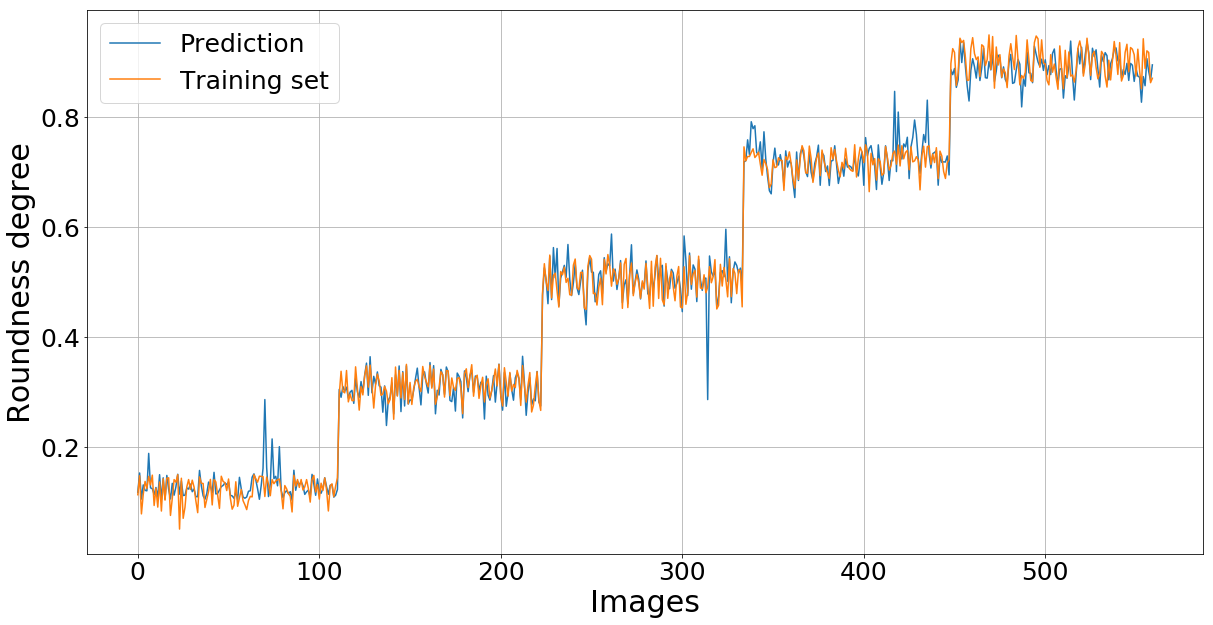

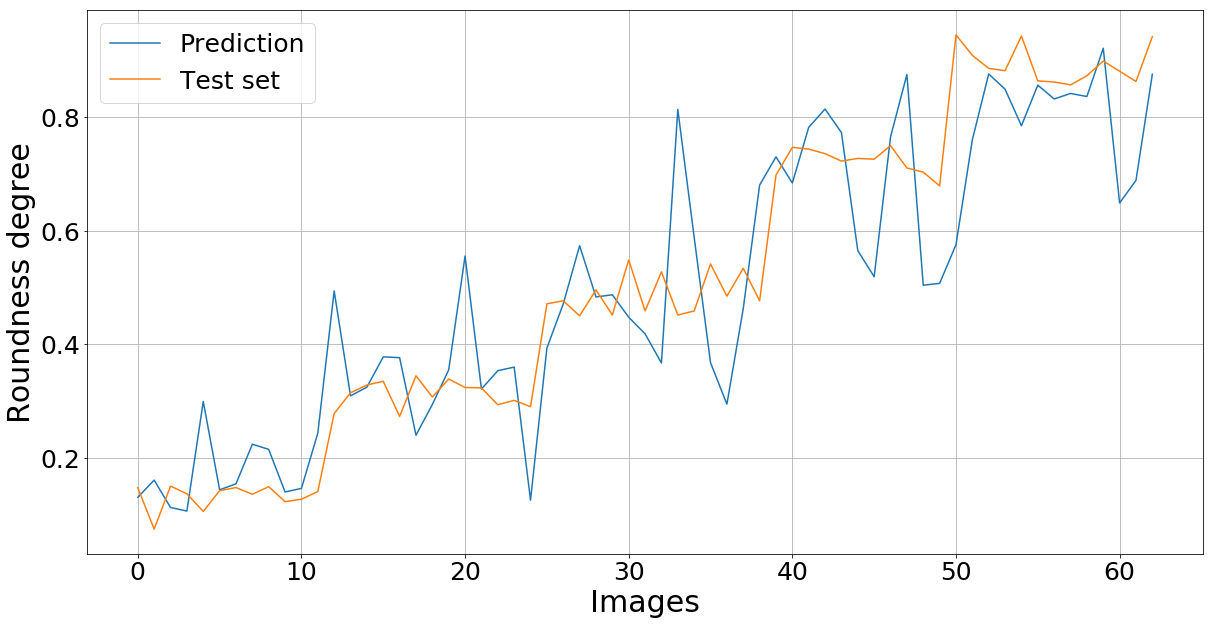

In [39]:
#ilteredDataX = filteredData#[:,np.r_[6:41,56:91,106:141,156:191]]
#train_x = ,250:374,500:625,750:875,1000:1123],1:242]
#train_x = pd.DataFrame(np_c(filteredDataY,filteredDataX))
#train_y = pd.DataFrame({'roundness':filteredDataY})
###COnfiguracion para 5 clases
#np.r_[0:124,250:374,500:625,750:875,1000:1123]
train_x = data.iloc[:,1:161]

train_y = data.iloc[:,0:1]
#np.r_[661:848,0:98]
#train_x = train_df.iloc[:,lim_inf:lim_sup]

#train_y = train_df.iloc[:,0:1]
#np.r_[214:275,0:27]
#test_x = test_df.iloc[:,lim_inf:lim_sup]

#test_y = test_df.iloc[:,0:1]

#Para cuando se usa PCA
train_x, test_x, train_y, test_y = train_test_split(train_x.iloc[:,np.r_[5:40,45:80,85:120,125:160]], train_y, test_size=0.1)
#Cuando se usa los datos directo 5:50,65:110,125:170,185:230
#train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.1)

sc = StandardScaler() 
train_x = sc.fit_transform(train_x) 
test_x = sc.transform(test_x)

n_cols = train_x.shape[1] 
model = Sequential() 
model.add(Dense(500, activation="relu", input_shape=(n_cols,))) 
model.add(Dense(150,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(150,activation="relu")) 
model.add(Dense(400,activation="relu")) 
model.add(Dense(75,activation="relu"))
model.add(Dense(75,activation="relu"))
model.add(Dense(75,activation="relu"))
model.add(Dense(150,activation="relu")) 
model.add(Dense(400,activation="relu")) 
model.add(Dense(75,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(1,activation="linear")) 
opt = keras.optimizers.Adadelta(learning_rate=0.005, rho=0.55, epsilon=3.5e-04)
#.SGD( learning_rate=0.04, momentum=0.0004)
#opt = keras.optimizers.RMSprop( learning_rate=0.00095, rho=0.04, epsilon=2e-5)
#learning_rate=0.005, rho=0.5, epsilon=3.5e-04

#my_lr_scheduler = keras.callbacks.LearningRateScheduler(adapt_learning_rate) 
model.compile(optimizer=opt, loss='mse',metrics=['mae','mse','mape'])

#set early stopping monitor so the model stops training when it won't improve anymore 
early_stopping_monitor = EarlyStopping(patience=20,monitor='loss')

#train model #,callbacks=[early_stopping_monitor]
model.fit(train_x,train_y,validation_data = (test_x,test_y),callbacks=[early_stopping_monitor], epochs=600,verbose=0)

#
train_y = train_y.reset_index().sort_values('index') 
train_x = train_x[train_y.index]
#train_x = train_x.reset_index()
#train_y = train_y.reset_index()
#train_x = train_x[:,1:train_x.shape[1]] 
train_y = train_y.reset_index() 
ynew = model.predict(train_x) 
diff = abs(ynew - train_y) 
dummy_y = train_y 
dummy_y['predicted'] = ynew 
mse = mean_squared_error(dummy_y['roundness'], dummy_y['predicted']) 
me = statistics.stdev(dummy_y['predicted'])/math.sqrt(dummy_y['predicted'].shape[0]) 
fig0 = plt.figure(0,figsize=(20,10)) 
#range(dummy_y['predicted'].shape[0],0,-1),
plt.plot(dummy_y['predicted'].sort_index(), label="Prediction") 
plt.plot(dummy_y['roundness'].sort_index(), label="Training set") 
plt.rc('legend', fontsize=25) 
plt.ylabel('Roundness degree', fontsize=30) 
plt.xlabel('Images', fontsize=30) 
plt.legend(loc="upper left")

#plt.title("Resultado del entrenamiento de la red neuronal profunda",fontsize=35)
plt.xticks(size = 25) 
plt.yticks(size = 25) 
plt.grid(True)
plt.show 
plt.savefig('trainingComparition.png')

##Test

test_res = test_y 

test_res = test_res.reset_index().sort_values('index') 
test_x = test_x[test_res.index]

#test_x = test_x.reset_index()

#test_x = test_x.iloc[:,1:test_x.shape[1]] 
test_res = test_res.reset_index() 
ynew = model.predict(test_x) 
diff2 = abs(ynew - test_y) 
test_res['predicted'] = ynew 
mse2 = mean_squared_error(test_res['roundness'], test_res['predicted']) 
me2 = statistics.stdev(test_res['predicted'])/math.sqrt(test_res['predicted'].shape[0]) 
plt.figure(figsize=(20,10)) 
#range(test_res['predicted'].shape[0],0,-1)
plt.plot(test_res['predicted'].sort_index(), label="Prediction") 
plt.plot(test_res['roundness'].sort_index(), label="Test set") 
plt.rc('legend', fontsize=25) 
plt.ylabel('Roundness degree', fontsize=30) 
plt.xlabel('Images', fontsize=30) 
plt.legend(loc="upper left")

#plt.title("Resultado del entrenamiento de la red neuronal profunda",fontsize=35) 
plt.xticks(size = 25) 
plt.yticks(size = 25) 
plt.grid(True) 
plt.show
plt.savefig('testComparition.png')

In [20]:
#Error cuadratico medio
mse

0.0010040962244568785

In [55]:
train_y


,level_0,index,roundness,predicted
0,352,1,0.112582,0.117066
1,199,2,0.147144,0.152210
2,433,3,0.077683,0.104649
3,57,4,0.113229,0.130422
4,254,5,0.136824,0.120569
5,182,6,0.123816,0.119681
6,347,7,0.146037,0.187857
7,340,8,0.130513,0.125153
8,247,9,0.148250,0.123532
9,503,10,0.093001,0.112960


In [57]:
train = pd.DataFrame(np.c_[train_y.roundness,train_x])
train.to_csv('train.csv', index = False, header=True)

In [60]:
test = pd.DataFrame(np.c_[test_res.roundness,test_x])
test.to_csv('test.csv', index = False, header=True)

In [47]:

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [21]:
#Error estandar o promedio
me

0.011653921742693458

In [40]:
#Error cuadratico medio
mse2

0.0160078175150397

In [35]:
#Error estandar o promedio
me2

0.036069078224256784

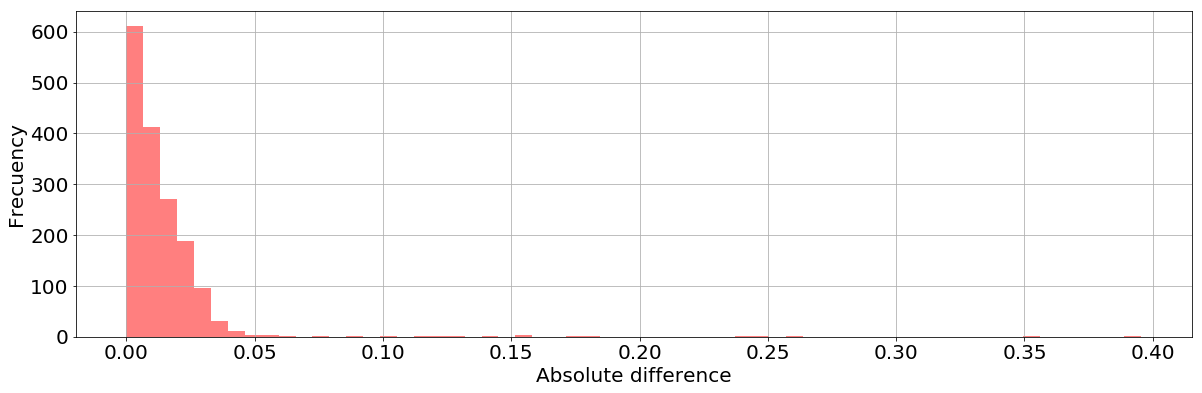

In [163]:
#Histogram of absolute differences Train set
abEr = abs(dummy_y['roundness']-dummy_y['predicted'])
fig=plt.figure(figsize=(20,6))
n, bins, patches = plt.hist(abEr, 60, facecolor='red', alpha=0.5)

# add a 'best fit' line
plt.xlabel('Absolute difference', fontsize=20)
plt.ylabel('Frecuency', fontsize=20)

# Tweak spacing to prevent clipping of ylabel
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(True)
#plt.title("Histograma del error absoluto",fontsize=28)
plt.show()
fig.savefig('histogramaErrorAbTrain.png')

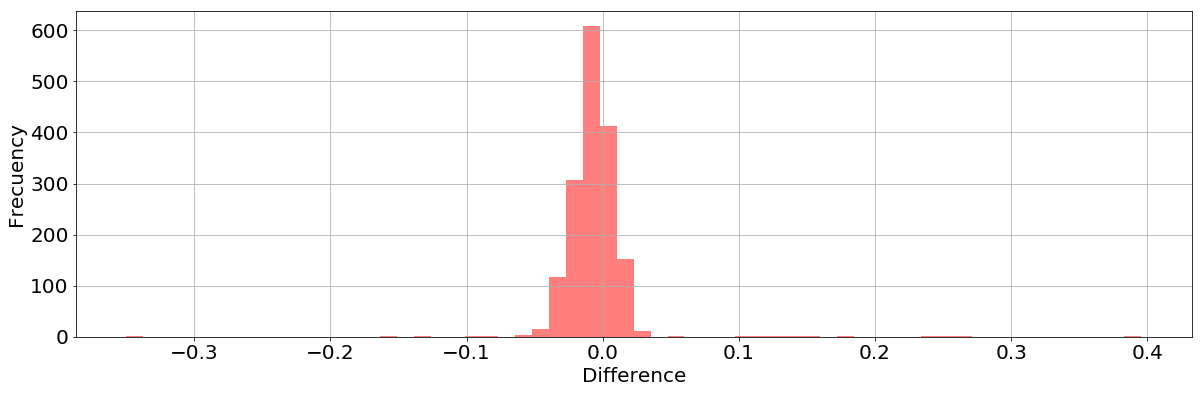

In [164]:
#Histogram of differences Train set
er = dummy_y['roundness']-dummy_y['predicted']
fig=plt.figure(figsize=(20,6))
n, bins, patches = plt.hist(er, 60, facecolor='red', alpha=0.5)

# add a 'best fit' line
plt.xlabel('Difference', fontsize=20)
plt.ylabel('Frecuency', fontsize=20)

# Tweak spacing to prevent clipping of ylabel
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(True)
#plt.title("Histograma del error absoluto",fontsize=28)
plt.show()
fig.savefig('histogramaErrorTrain.png')

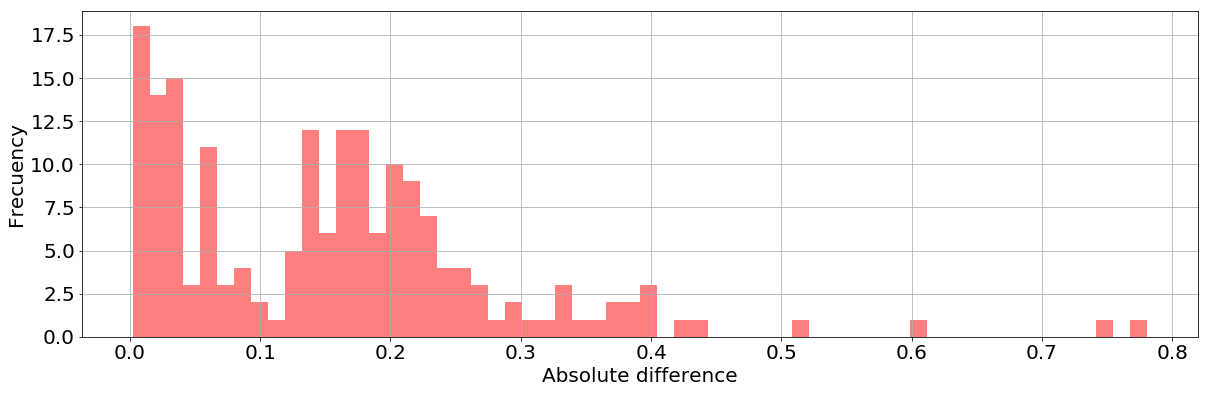

In [165]:
#Histogram of absolute differences test set
abEr = abs(test_res['roundness']-test_res['predicted'])
fig=plt.figure(figsize=(20,6))
n, bins, patches = plt.hist(abEr, 60, facecolor='red', alpha=0.5)

# add a 'best fit' line
plt.xlabel('Absolute difference', fontsize=20)
plt.ylabel('Frecuency', fontsize=20)

# Tweak spacing to prevent clipping of ylabel
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(True)
#plt.title("Histograma del error absoluto",fontsize=28)
plt.show()
fig.savefig('histogramaErrorAbTest.png')

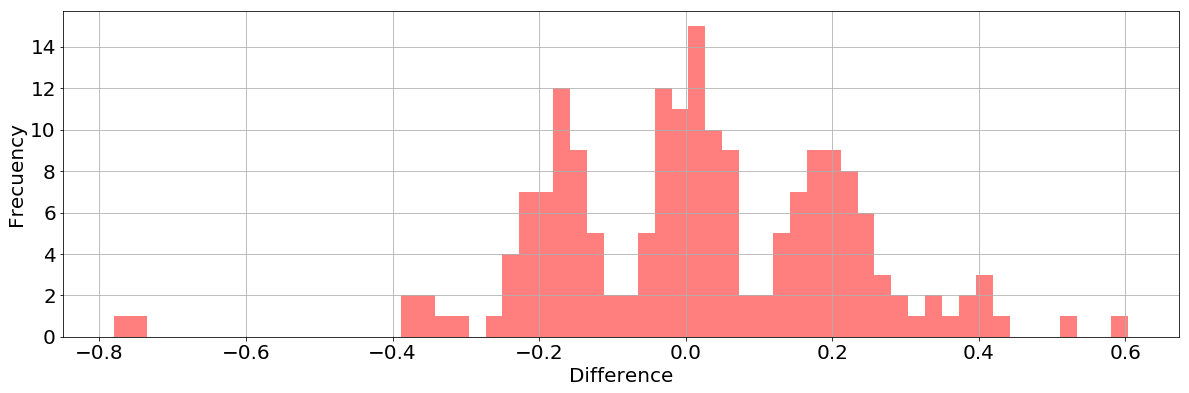

In [166]:
#Histogram of differences test set
er = test_res['roundness']-test_res['predicted']
fig=plt.figure(figsize=(20,6))
n, bins, patches = plt.hist(er, 60, facecolor='red', alpha=0.5)

# add a 'best fit' line
plt.xlabel('Difference', fontsize=20)
plt.ylabel('Frecuency', fontsize=20)

# Tweak spacing to prevent clipping of ylabel
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(True)
#plt.title("Histograma del error absoluto",fontsize=28)
plt.show()
fig.savefig('histogramaErrorTest.png')

In [179]:
abEr = abs(dummy_y['roundness']-dummy_y['predicted'])
set1 = abEr[abEr < 0.02]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

79.21212121212122

In [180]:
abEr = abs(test_res['roundness']-test_res['predicted'])
set1 = abEr[abEr < 0.05]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

26.08695652173913